In the class we have implemented a polynomial object, that is extended as below.
We show how to define the $+$ operator to implement the addition operation of two polynomials. The current implementation is incomplete as it can not add $p(x) = x^2 + 2x + 3$ and $q(x) = x+4$ if these are defined as arrays of different sizes. You should fix this
Implement the substraction $-$ (method sub)
Implement multiplication $*$ (method mul). Note that this is equivalent to the convolution of the coefficients
Implement ploting the graph of the polynomial (method plot). In this function, you should use matplotlib

Result of p:
2z^2 3z^1 1
[2, 3, 1]
--------------------
Result of q:
0z^2 4z^1 4
[0, 4, 4]
--------------------
Result of p + q:
2z^2 7z^1 5
[2, 7, 5]
--------------------
Result of p - q:
2z^2 -1z^1 -3
[2, -1, -3]
--------------------
Result of p * q:
0z^4 8z^3 20z^2 16z^1 4
[0, 8, 20, 16, 4]
--------------------
p plot


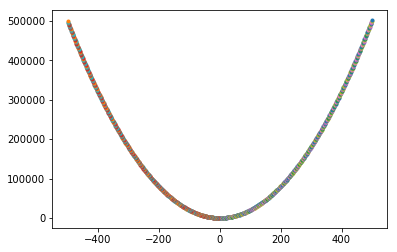

q plot


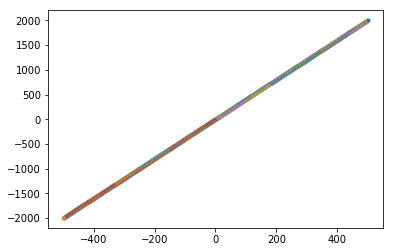

In [64]:

import matplotlib.pyplot as plt
import numpy as np
class polynomial(object):
    def __init__(self, c, v):
        self.coeff = c
        self.v = v
        self.degree = len(c) -1
    def __repr__(self):
        D = len(self.coeff)
        for i in range(D):
            if i<D-1:
                print(self.coeff[i], end='')
                print('{}^{} '.format(self.v, D-i-1), end='')
            else:
                print(self.coeff[i])
        
        return str(self.coeff)
    
    
    def __add__(self,b):
        """Computes a+b and returns the result"""
        D = len(self.coeff)
        
        coeff = []
        for i in range(D):
            coeff.append(self.coeff[i] + b.coeff[i])
        
        return polynomial(coeff, self.v)
    
    def __mul__(self,b):
        """Computes a*b and returns the result"""
        n = self.degree + b.degree   
        multi_co = [0]*(n+1)
        
        for i in range(0, self.degree + 1):
            for j in range(0, b.degree + 1):
                multi_co[i+j] += self.coeff[i] * b.coeff[j]
        
        return polynomial(multi_co, self.v)
    
    def __sub__(self,b):
        """Computes a-b and returns the result"""
        d = max(self.degree, b.degree) + 1 
        
        self_temp =  [0]*(d-self.degree-1)+self.coeff
        b_temp = [0]*(d-b.degree-1)+b.coeff
        
        coeff = []
        for i in range(d):
            coeff.append(self_temp[i] - b_temp[i])
        
        return polynomial(coeff, self.v)
    
    def plot(self, number_of_points=1000):
        """ Computes the plot range"""
        plot_range = round(number_of_points/2)+1 
       
        for i in range(plot_range):
            plt.plot(i, np.polyval(self.coeff, i), marker='.')
            plt.plot(-i, np.polyval(self.coeff, -i), marker='.')
        
        plt.show()
    
print('Result of p:')
p = polynomial([2,3,1], 'z')
print(p)

print('--------------------')
print('Result of q:')

q = polynomial([0,4,4], 'z')
# Your program must also work when we define more naturally
# q = polynomial([4,4], 'z')
print(q)

print('--------------------')
print('Result of p + q:')
r1 = p + q
print(r1)
print('--------------------')
print('Result of p - q:')
r3 = p - q
print(r3)
print('--------------------')
print('Result of p * q:')
r2 = p * q
print(r2)
print('--------------------')

print('p plot')
p.plot()
print('q plot')
q.plot()